## 1.导入库

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno#缺失值库

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

## 2.数据概览

In [3]:
dict_path="E:/数据挖掘/数维杯/2022“ShuWei Cup”_Problem/2022“ShuWei Cup”_Problem/2022_“ShuWei Cup”C_Problem"
data_path=dict_path+"/data"
img_path=dict_path+"/img"

In [4]:
data=pd.read_csv(data_path+"/ADNIMERGE_New.csv",low_memory=False)
data.head(10)

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,58:48.0
5,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-8,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0,01:40.0
6,4,ADNI1,ADNI1,022_S_0004,22,m06,2006-5-2,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,0.479124,5.73770,6,6,01:40.0
7,4,ADNI1,ADNI1,022_S_0004,22,m12,2006-11-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.015740,12.16390,12,12,01:40.0
8,4,ADNI1,ADNI1,022_S_0004,22,m18,2007-5-14,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,1.511290,18.09840,18,18,01:40.0
9,4,ADNI1,ADNI1,022_S_0004,22,m36,2008-11-18,LMCI,67.5,Male,...,13.29,NaN,NaN,NaN,NaN,3.028060,36.26230,36,36,01:40.0


In [5]:
data["EcogPtMem"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16217      NaN
16218    2.375
16219      NaN
16220      NaN
16221      NaN
Name: EcogPtMem, Length: 16222, dtype: float64

In [6]:
data["EcogPtMem_bl"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16217    2.625
16218    1.500
16219    1.625
16220    1.750
16221    1.125
Name: EcogPtMem_bl, Length: 16222, dtype: float64

In [7]:
print("Shape of data:",data.shape)

Shape of data: (16222, 116)


In [8]:
data.columns

Index(['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER',
       ...
       'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'FBB_bl', 'Years_bl',
       'Month_bl', 'Month', 'M', 'update_stamp'],
      dtype='object', length=116)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16222 entries, 0 to 16221
Columns: 116 entries, RID to update_stamp
dtypes: float64(88), int64(5), object(23)
memory usage: 14.4+ MB


In [10]:
data.describe()

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,FBB,CDRSB,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M
count,16222.000000,16222.000000,16213.000000,16222.000000,15907.000000,3693.000000,223.000000,3080.000000,514.000000,11634.000000,...,8729.000000,8898.000000,11127.000000,154.000000,7729.000000,1048.000000,16222.000000,16222.000000,16222.000000,16222.000000
mean,2866.047343,81.490692,73.250786,16.104981,0.517131,1.175624,1.783161,1.193030,1.174792,2.044482,...,1.738420,1.604383,1.226403,1.582256,1.187312,1.163628,2.695076,32.274644,32.193688,32.059980
std,2205.254476,132.050554,7.011759,2.766438,0.647568,0.167288,0.422511,0.230866,0.246077,2.860615,...,0.862778,0.671764,0.153262,0.302114,0.220179,0.237175,2.888387,34.589618,34.578929,34.502228
min,2.000000,2.000000,50.400000,4.000000,0.000000,0.566989,1.095000,0.809000,0.870200,0.000000,...,1.000000,1.000000,0.621933,1.155000,0.810000,0.870200,0.000000,0.000000,0.000000,0.000000
25%,741.000000,22.000000,68.500000,14.000000,0.000000,1.071700,1.361250,1.010075,0.996225,0.000000,...,1.000000,1.102560,1.134320,1.360000,1.012800,0.995100,0.503765,6.032790,6.000000,6.000000
50%,2263.000000,41.000000,73.300000,16.000000,0.000000,1.180590,1.850000,1.106800,1.053850,1.000000,...,1.500000,1.333330,1.234490,1.490000,1.099900,1.042000,1.905545,22.819700,24.000000,24.000000
75%,4668.000000,123.000000,78.100000,18.000000,1.000000,1.287080,2.127500,1.358425,1.350275,3.000000,...,2.000000,1.918920,1.331450,1.835000,1.347300,1.318600,4.002740,47.934400,48.000000,48.000000
max,7105.000000,941.000000,91.400000,20.000000,2.000000,1.776170,2.927500,2.686600,2.008800,18.000000,...,4.000000,3.948720,1.776170,2.282500,2.010100,1.909000,16.539400,198.066000,198.000000,198.000000


## 3.异常值分析

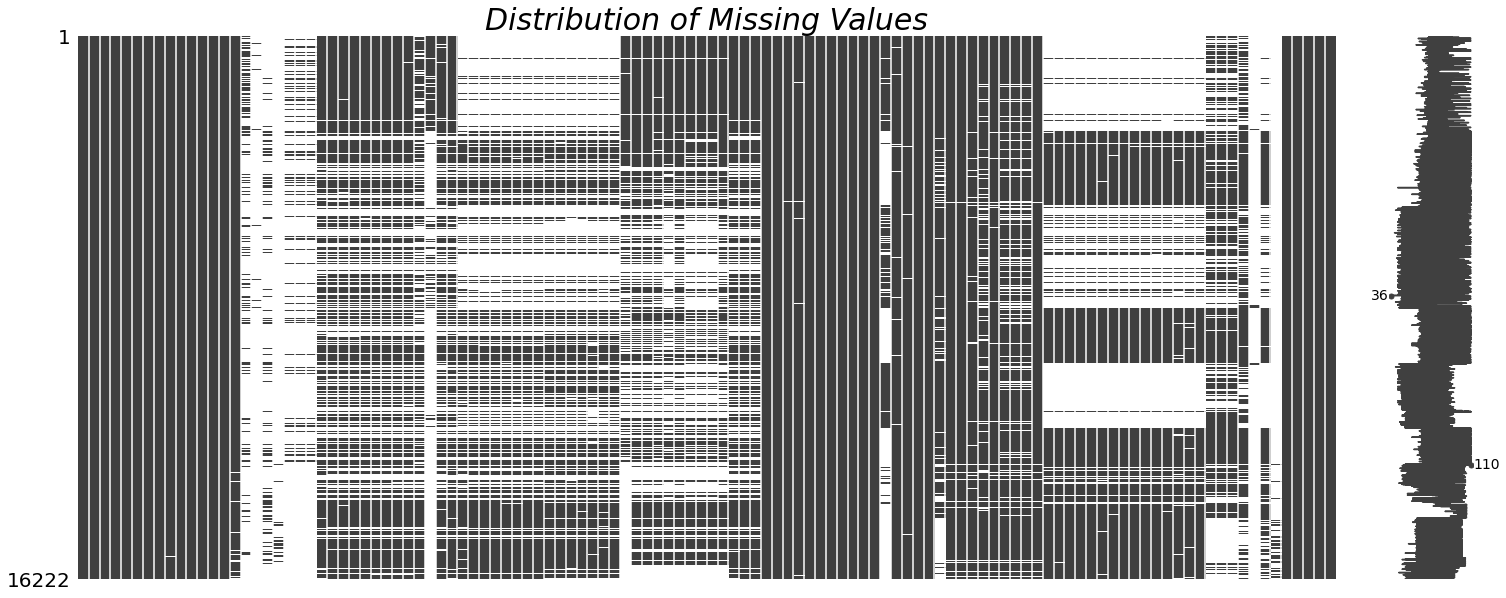

In [11]:
msno.matrix(data)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')
plt.savefig(img_path+'/DistributionOfMissingValues.png')

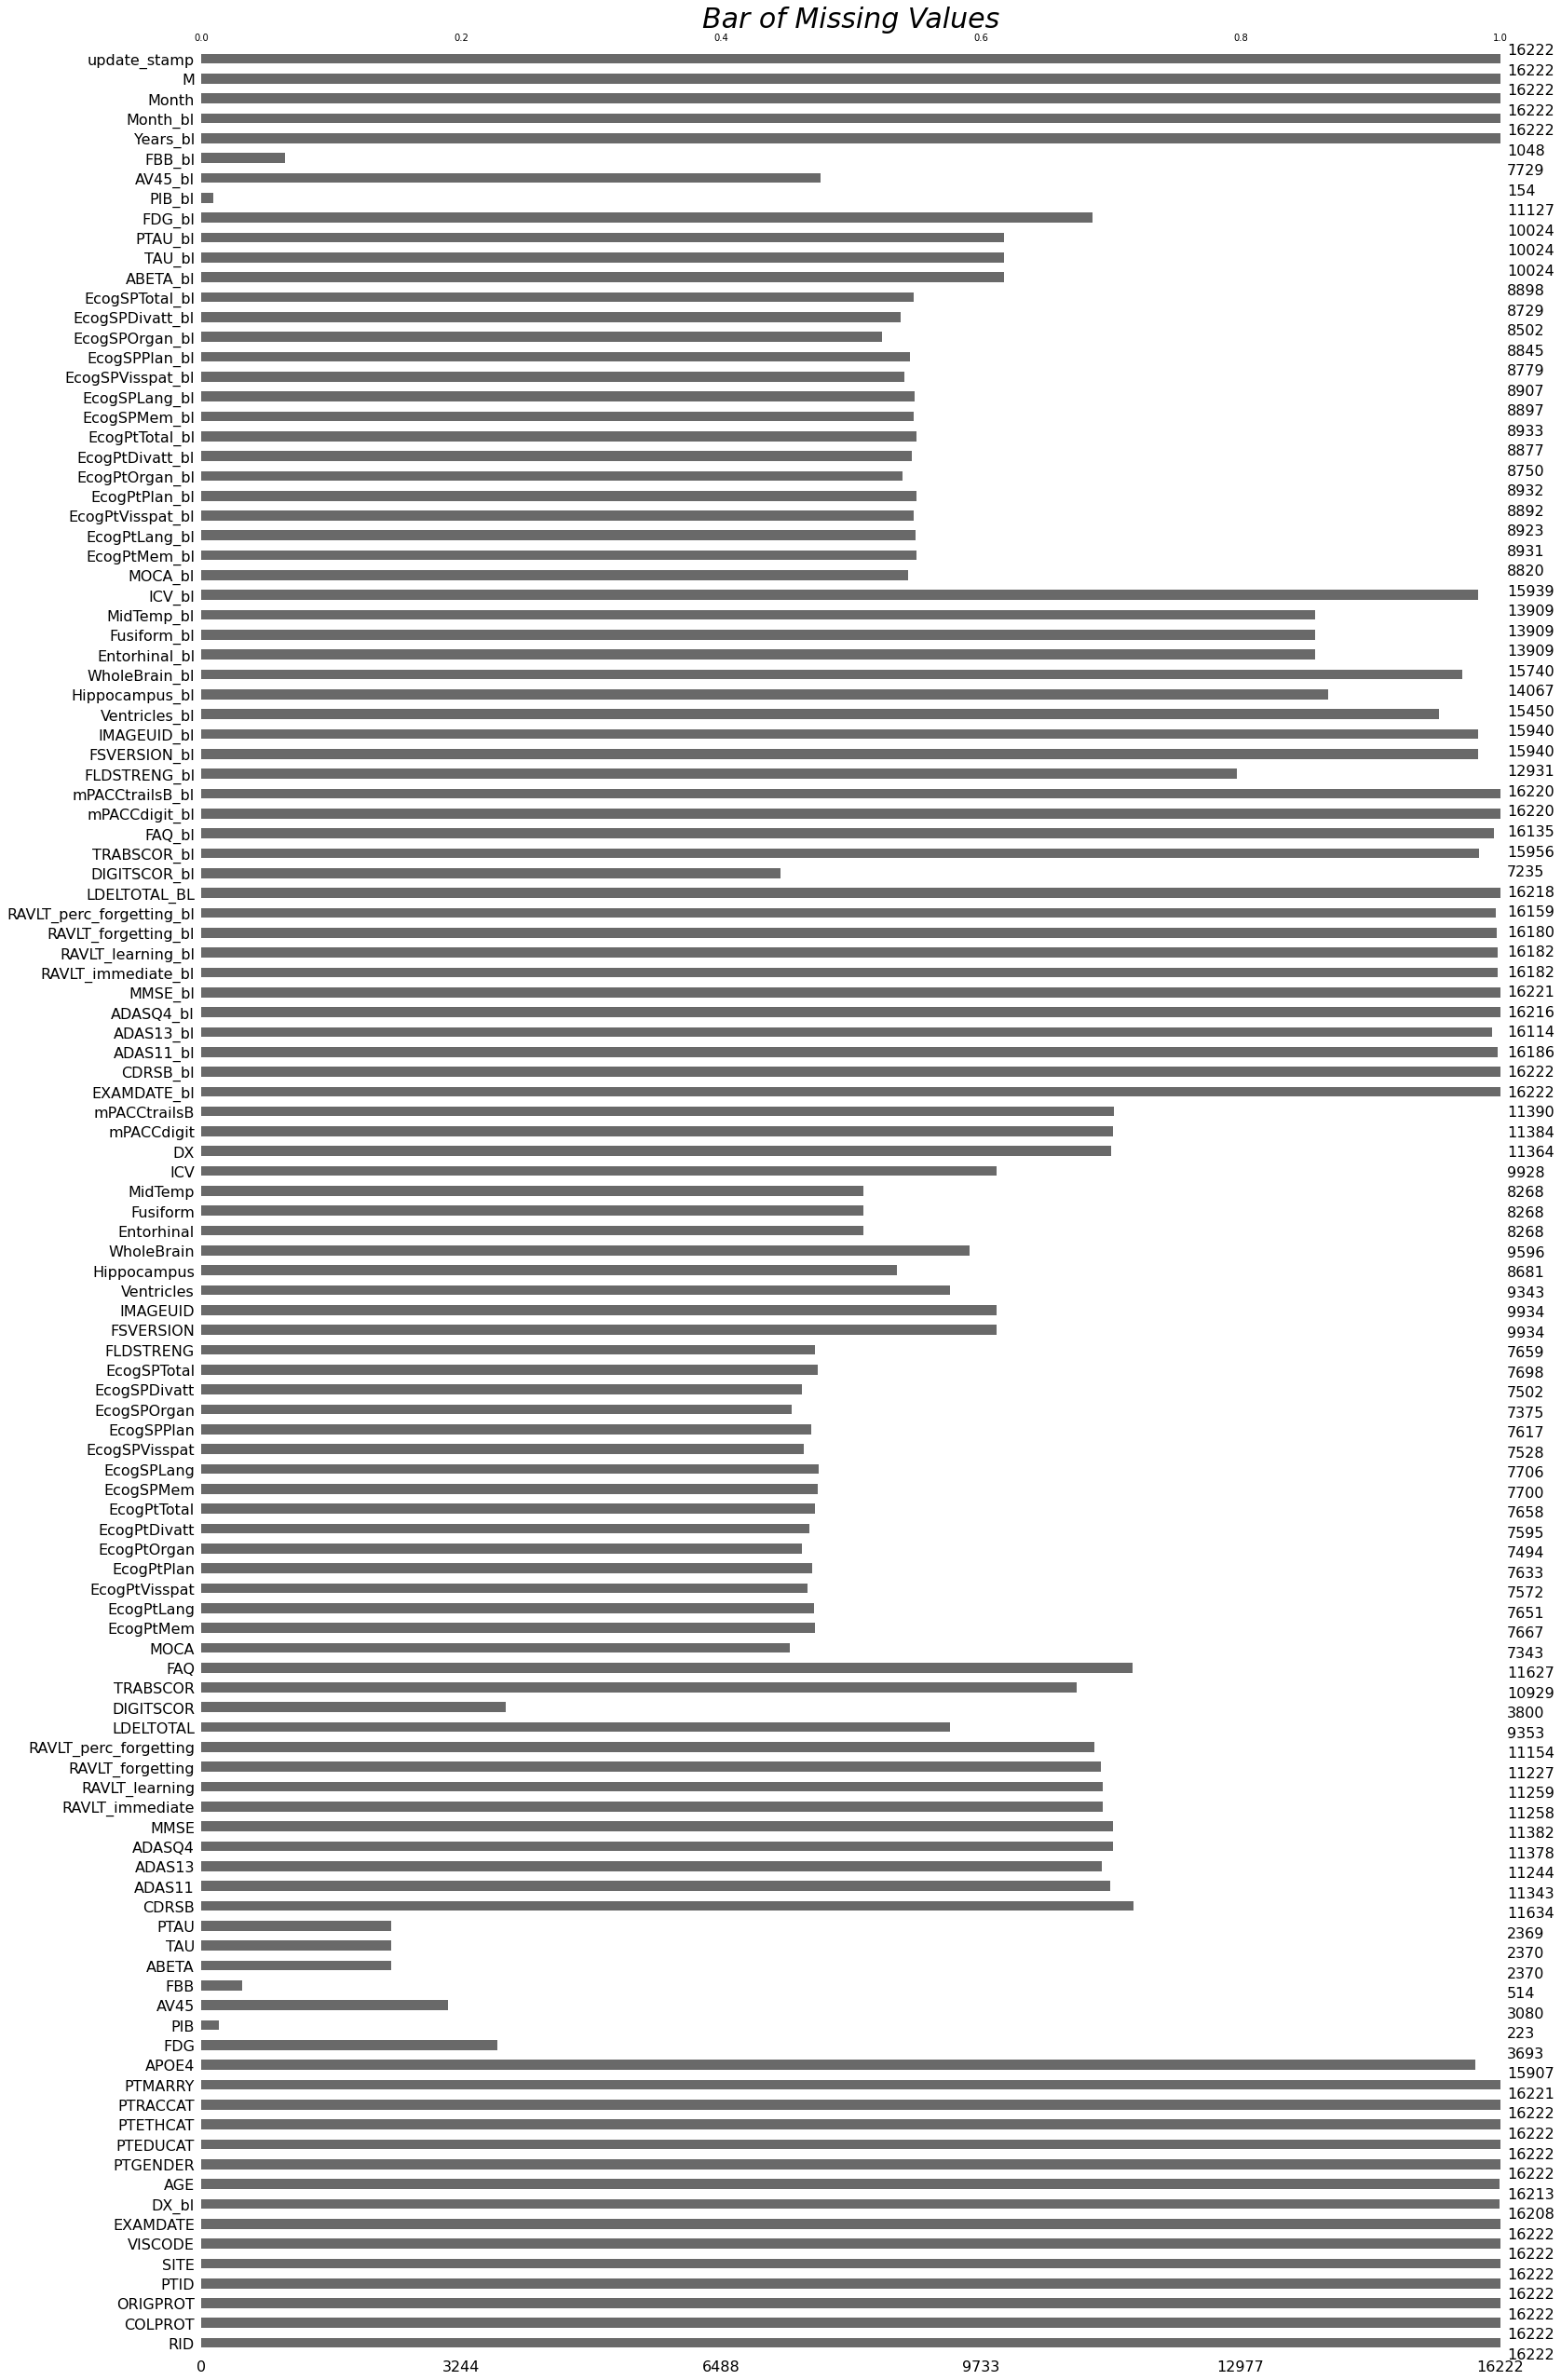

In [12]:
msno.bar(data)
plt.title('Bar of Missing Values',fontsize=30, fontstyle= 'oblique')
plt.savefig(img_path+'/BarOfMissingValues.png')

<Figure size 50000x50000 with 0 Axes>

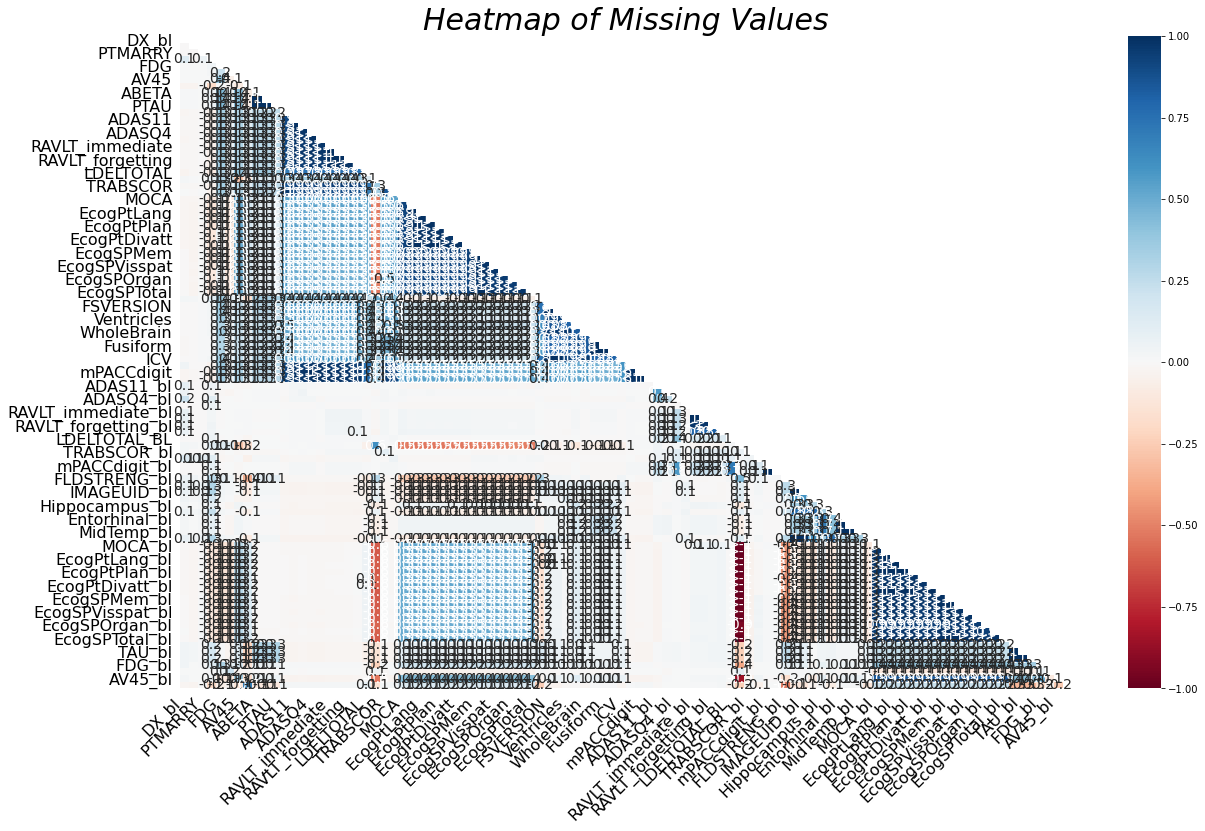

In [13]:
plt.figure(figsize=(100,100),dpi=500)
msno.heatmap(data)
plt.title('Heatmap of Missing Values',fontsize=30, fontstyle= 'oblique')
#反应了缺失值属性之间的相关性
plt.savefig(img_path+'/HeatmapOfMissingValues.png')

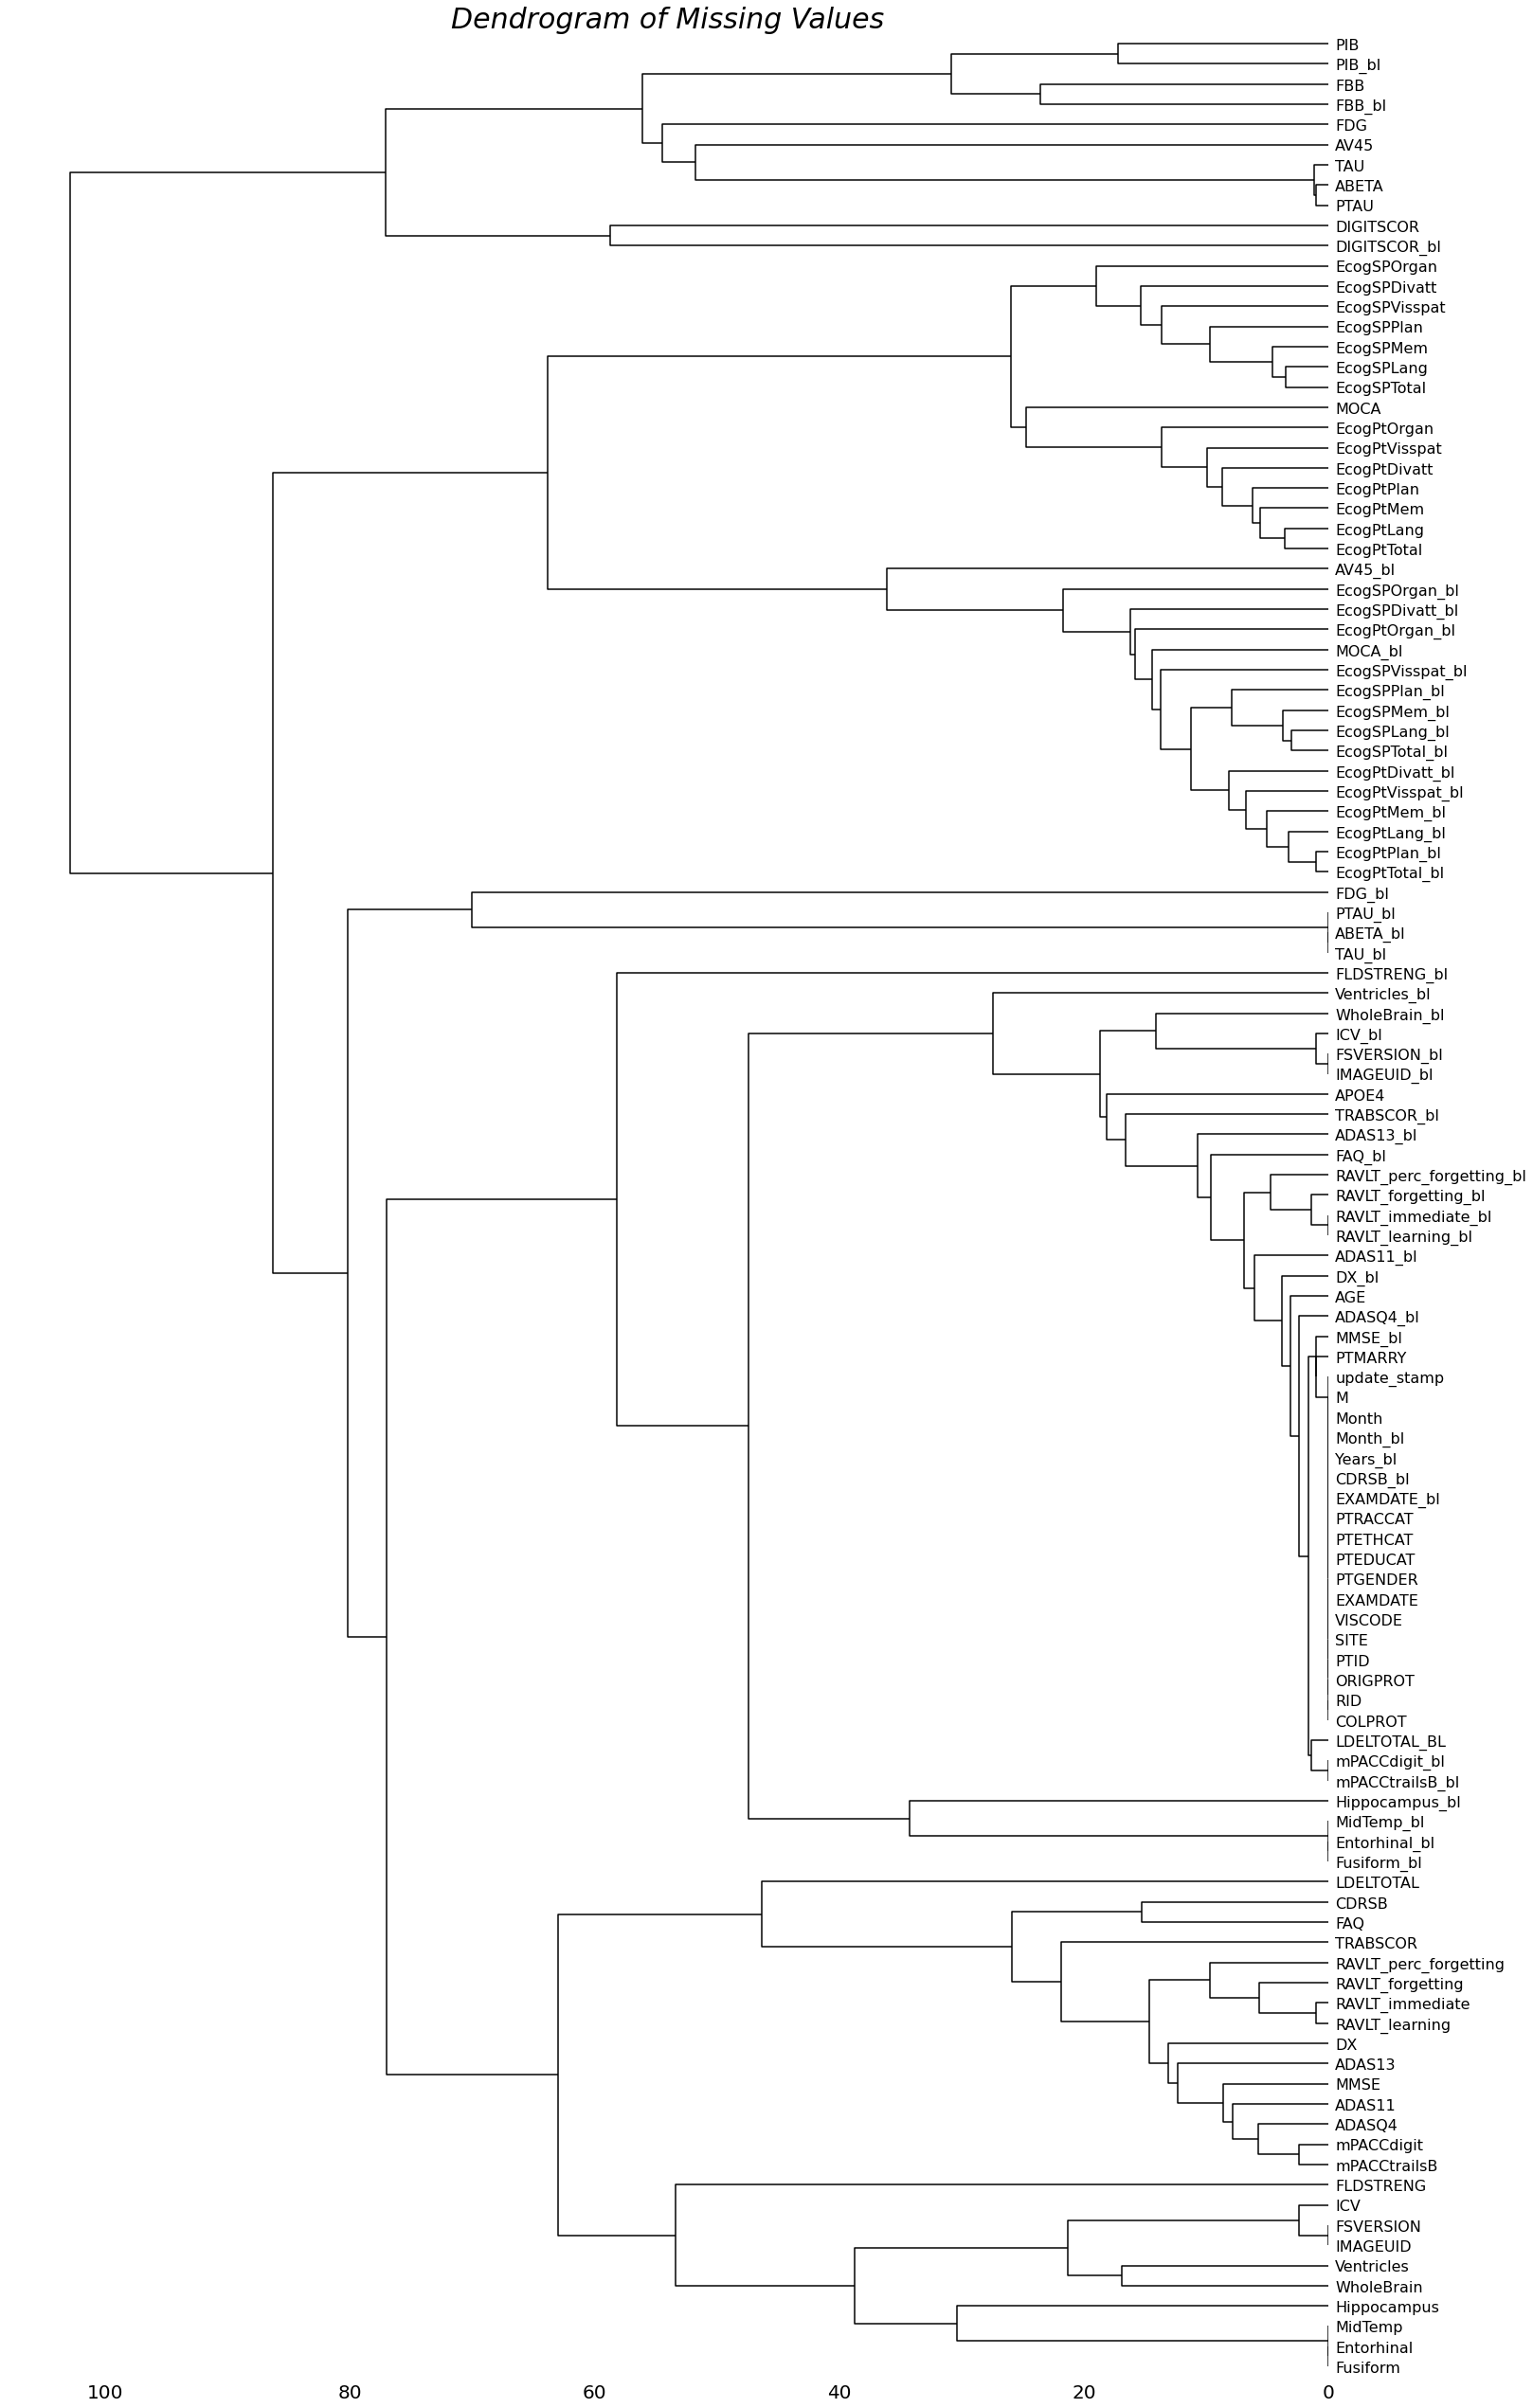

In [14]:
msno.dendrogram(data)
plt.title('Dendrogram of Missing Values',fontsize=30, fontstyle= 'oblique')
#missingno 的树状图采用层次聚类算法对特征进行聚类，如上图所示，左侧的特征数据为一类，彼此的距离为 0（因为没有缺失数据），右侧的特征数据为另一类（两个存在缺失数据的特征）。
plt.savefig(img_path+'/DendrogramOfMissingValues.png')

## 4.异常值处理

In [15]:
#纵向筛选
#计算缺失率CDRSB
def calculate_missing_rate_col(df):
    df_columns=df.columns
    all_count=df.shape[0]#所有数值的个数
    missing_rate_list={}
    for i in df_columns:
        notmissing_count=df[i].count()
        missing_rate=(all_count-notmissing_count)/all_count
        missing_rate_list[i]=missing_rate
    return missing_rate_list

missing_rate_list=calculate_missing_rate_col(data)
missing_rate_list

{'RID': 0.0,
 'COLPROT': 0.0,
 'ORIGPROT': 0.0,
 'PTID': 0.0,
 'SITE': 0.0,
 'VISCODE': 0.0,
 'EXAMDATE': 0.0,
 'DX_bl': 0.0008630255208975466,
 'AGE': 0.0005548021205769942,
 'PTGENDER': 0.0,
 'PTEDUCAT': 0.0,
 'PTETHCAT': 0.0,
 'PTRACCAT': 0.0,
 'PTMARRY': 6.164468006411046e-05,
 'APOE4': 0.019418074220194797,
 'FDG': 0.77234619652324,
 'PIB': 0.9862532363457034,
 'AV45': 0.8101343854025398,
 'FBB': 0.9683146344470472,
 'ABETA': 0.8539021082480582,
 'TAU': 0.8539021082480582,
 'PTAU': 0.8539637529281223,
 'CDRSB': 0.28282579213413883,
 'ADAS11': 0.300764394032795,
 'ADAS13': 0.3068672173591419,
 'ADASQ4': 0.2986068302305511,
 'MMSE': 0.29836025151029466,
 'RAVLT_immediate': 0.30600419183824434,
 'RAVLT_learning': 0.30594254715818026,
 'RAVLT_forgetting': 0.3079151769202318,
 'RAVLT_perc_forgetting': 0.3124152385649118,
 'LDELTOTAL': 0.4234373073603748,
 'DIGITSCOR': 0.7657502157563802,
 'TRABSCOR': 0.3262852915793367,
 'FAQ': 0.2832573048945876,
 'MOCA': 0.5473431142892369,
 'EcogPtM

In [16]:
len(missing_rate_list)

116

In [17]:
#筛选
missing_rate_less50={key:value for key,value in missing_rate_list.items() if value<0.5}
missing_rate_less50

{'RID': 0.0,
 'COLPROT': 0.0,
 'ORIGPROT': 0.0,
 'PTID': 0.0,
 'SITE': 0.0,
 'VISCODE': 0.0,
 'EXAMDATE': 0.0,
 'DX_bl': 0.0008630255208975466,
 'AGE': 0.0005548021205769942,
 'PTGENDER': 0.0,
 'PTEDUCAT': 0.0,
 'PTETHCAT': 0.0,
 'PTRACCAT': 0.0,
 'PTMARRY': 6.164468006411046e-05,
 'APOE4': 0.019418074220194797,
 'CDRSB': 0.28282579213413883,
 'ADAS11': 0.300764394032795,
 'ADAS13': 0.3068672173591419,
 'ADASQ4': 0.2986068302305511,
 'MMSE': 0.29836025151029466,
 'RAVLT_immediate': 0.30600419183824434,
 'RAVLT_learning': 0.30594254715818026,
 'RAVLT_forgetting': 0.3079151769202318,
 'RAVLT_perc_forgetting': 0.3124152385649118,
 'LDELTOTAL': 0.4234373073603748,
 'TRABSCOR': 0.3262852915793367,
 'FAQ': 0.2832573048945876,
 'FSVERSION': 0.3876217482431266,
 'IMAGEUID': 0.3876217482431266,
 'Ventricles': 0.42405375416101593,
 'Hippocampus': 0.46486253236345704,
 'WholeBrain': 0.40845765010479596,
 'Entorhinal': 0.49032178522993464,
 'Fusiform': 0.49032178522993464,
 'MidTemp': 0.4903217852

In [18]:
len(missing_rate_less50)

88

In [19]:
# # top10_job_title = df['job_title'].value_counts()[:10]
# fig = px.bar(y=missing_rate_less50.values, 
#              x=missing_rate_less50.keys, 
#              color = missing_rate_less50.keys,
#              color_discrete_sequence=px.colors.sequential.PuBuGn,
#              text=missing_rate_less50.values,
#              title= 'Bar',
#              template= 'plotly_dark')
# fig.update_layout(
#     xaxis_title="Job Titles",
#     yaxis_title="count",
#     font = dict(size=17,family="Franklin Gothic"))
# fig.show()

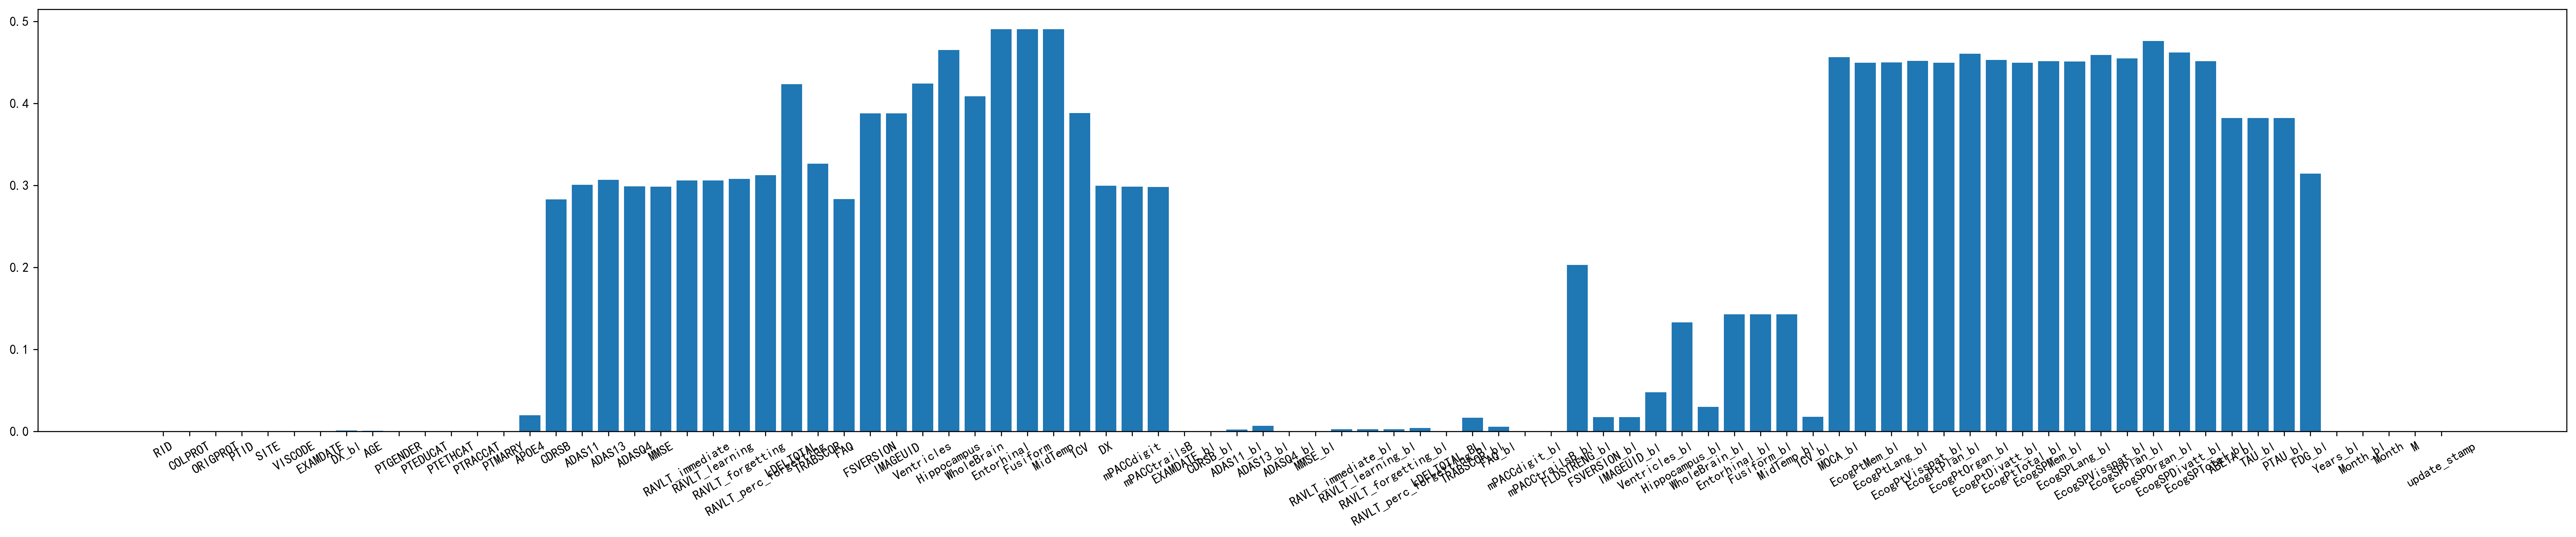

In [20]:
fig = plt.figure(figsize=(35,6),dpi=300)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x1=list(missing_rate_less50.keys())
x1=list(map(str,x1))#使用list（map（str，x1））方法，将返回一个列表，列表中所有元素是str类型
y1=list(missing_rate_less50.values())
plt.xticks(rotation=30)
plt.bar(x1,y1)
plt.savefig(img_path+'/missing_rate_less50_distribution.png')
#             my_dict = {'Southampton': '33.7%', 'Cherbourg': '55.36%', 'Queenstown': '38.96%'}
# perc =  [float(i[:-1]) for i in my_dict.values()]
# sns.barplot(x=list(my_dict.keys()),y=perc)

In [21]:
data50=data[list(missing_rate_less50.keys())]
data50.to_csv(data_path+'/data50.csv')
data50.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,NaN,NaN,NaN,NaN,1.33615,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,...,NaN,741.5,239.7,22.83,1.10860,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,...,NaN,741.5,239.7,22.83,1.10860,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,...,NaN,741.5,239.7,22.83,1.10860,0.999316,11.96720,12,12,58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-9-12,AD,81.3,Male,...,NaN,741.5,239.7,22.83,1.10860,1.998630,23.93440,24,24,58:48.0


In [22]:
data.count(axis=1)

0        74
1        80
2        76
3        80
4        77
         ..
16217    61
16218    90
16219    61
16220    64
16221    60
Length: 16222, dtype: int64

In [23]:
#横向筛选 行缺失率
# def calculate_missing_rate_row(df):

#纵向筛选
#计算缺失率CDRSB
missing_rate_col_list=[]
def calculate_missing_rate_col(df):
    all_count=df.shape[1]#特征个数
    for i in range(df.shape[0]):
        notmissing_count=df.count(axis=1)[i]
        missing_rate_col=(all_count-notmissing_count)/all_count
        missing_rate_col_list.append(missing_rate_col)
    return missing_rate_col_list
missing_rate_col_list=calculate_missing_rate_col(data50)

data50["missing_rate_col"]=missing_rate_col_list
data50["missing_rate_col"]

0        0.204545
1        0.170455
2        0.181818
3        0.170455
4        0.170455
           ...   
16217    0.318182
16218    0.159091
16219    0.318182
16220    0.284091
16221    0.329545
Name: missing_rate_col, Length: 16222, dtype: float64

In [24]:
data50_20=data50[data50["missing_rate_col"]>=0.2]
data50_20.to_csv(data_path+'/data50_20.csv')
data50_20

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,Years_bl,Month_bl,Month,M,update_stamp,missing_rate_col
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,NaN,NaN,NaN,1.33615,0.000000,0.00000,0,0,58:48.0,0.204545
15,6,ADNI1,ADNI1,100_S_0006,100,bl,2005-11-29,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0,01:40.0,0.215909
16,6,ADNI1,ADNI1,100_S_0006,100,m06,2006-6-1,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,0.503765,6.03279,6,6,01:40.0,0.227273
17,6,ADNI1,ADNI1,100_S_0006,100,m12,2006-11-20,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,0.974675,11.67210,12,12,01:40.0,0.215909
18,6,ADNI1,ADNI1,100_S_0006,100,m18,2007-5-15,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,1.456540,17.44260,18,18,01:40.0,0.227273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,6559,ADNI3,ADNI3,126_S_6559,126,m48,2022-11-1,CN,66.2,Female,...,NaN,NaN,NaN,NaN,4.142370,49.60660,48,48,59:11.0,0.215909
16217,6080,ADNI3,ADNI3,941_S_6080,941,m60,2022-11-4,SMC,76.8,Female,...,NaN,NaN,NaN,NaN,5.051330,60.49180,60,60,00:12.0,0.318182
16219,6498,ADNI3,ADNI3,305_S_6498,305,m48,2022-11-7,EMCI,79.4,Male,...,NaN,NaN,NaN,1.13679,4.117730,49.31150,48,48,59:52.0,0.318182
16220,4119,ADNI3,ADNI2,003_S_4119,3,m132,2022-11-10,CN,79.3,Male,...,>1700,305.6,30.31,1.30487,11.230700,134.49200,132,132,59:26.0,0.284091


In [25]:
data50_20

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,Years_bl,Month_bl,Month,M,update_stamp,missing_rate_col
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,NaN,NaN,NaN,1.33615,0.000000,0.00000,0,0,58:48.0,0.204545
15,6,ADNI1,ADNI1,100_S_0006,100,bl,2005-11-29,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0,01:40.0,0.215909
16,6,ADNI1,ADNI1,100_S_0006,100,m06,2006-6-1,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,0.503765,6.03279,6,6,01:40.0,0.227273
17,6,ADNI1,ADNI1,100_S_0006,100,m12,2006-11-20,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,0.974675,11.67210,12,12,01:40.0,0.215909
18,6,ADNI1,ADNI1,100_S_0006,100,m18,2007-5-15,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,1.456540,17.44260,18,18,01:40.0,0.227273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,6559,ADNI3,ADNI3,126_S_6559,126,m48,2022-11-1,CN,66.2,Female,...,NaN,NaN,NaN,NaN,4.142370,49.60660,48,48,59:11.0,0.215909
16217,6080,ADNI3,ADNI3,941_S_6080,941,m60,2022-11-4,SMC,76.8,Female,...,NaN,NaN,NaN,NaN,5.051330,60.49180,60,60,00:12.0,0.318182
16219,6498,ADNI3,ADNI3,305_S_6498,305,m48,2022-11-7,EMCI,79.4,Male,...,NaN,NaN,NaN,1.13679,4.117730,49.31150,48,48,59:52.0,0.318182
16220,4119,ADNI3,ADNI2,003_S_4119,3,m132,2022-11-10,CN,79.3,Male,...,>1700,305.6,30.31,1.30487,11.230700,134.49200,132,132,59:26.0,0.284091


In [26]:
#再做一次缺失值分析

<Figure size 50000x50000 with 0 Axes>

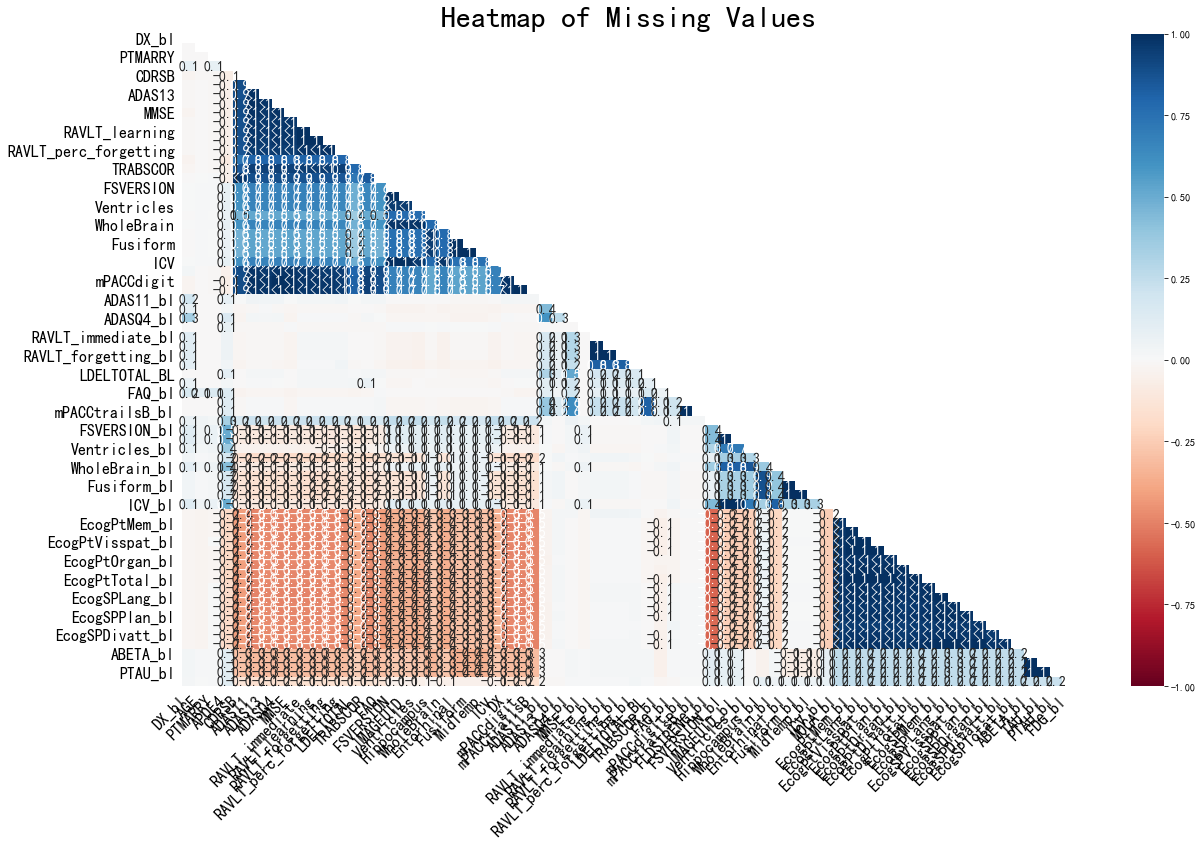

In [27]:
plt.figure(figsize=(100,100),dpi=500)
msno.heatmap(data50_20)
plt.title('Heatmap of Missing Values',fontsize=30, fontstyle= 'oblique')
#反应了缺失值属性之间的相关性
plt.savefig(img_path+'/HeatmapOfMissingValues——88.png')

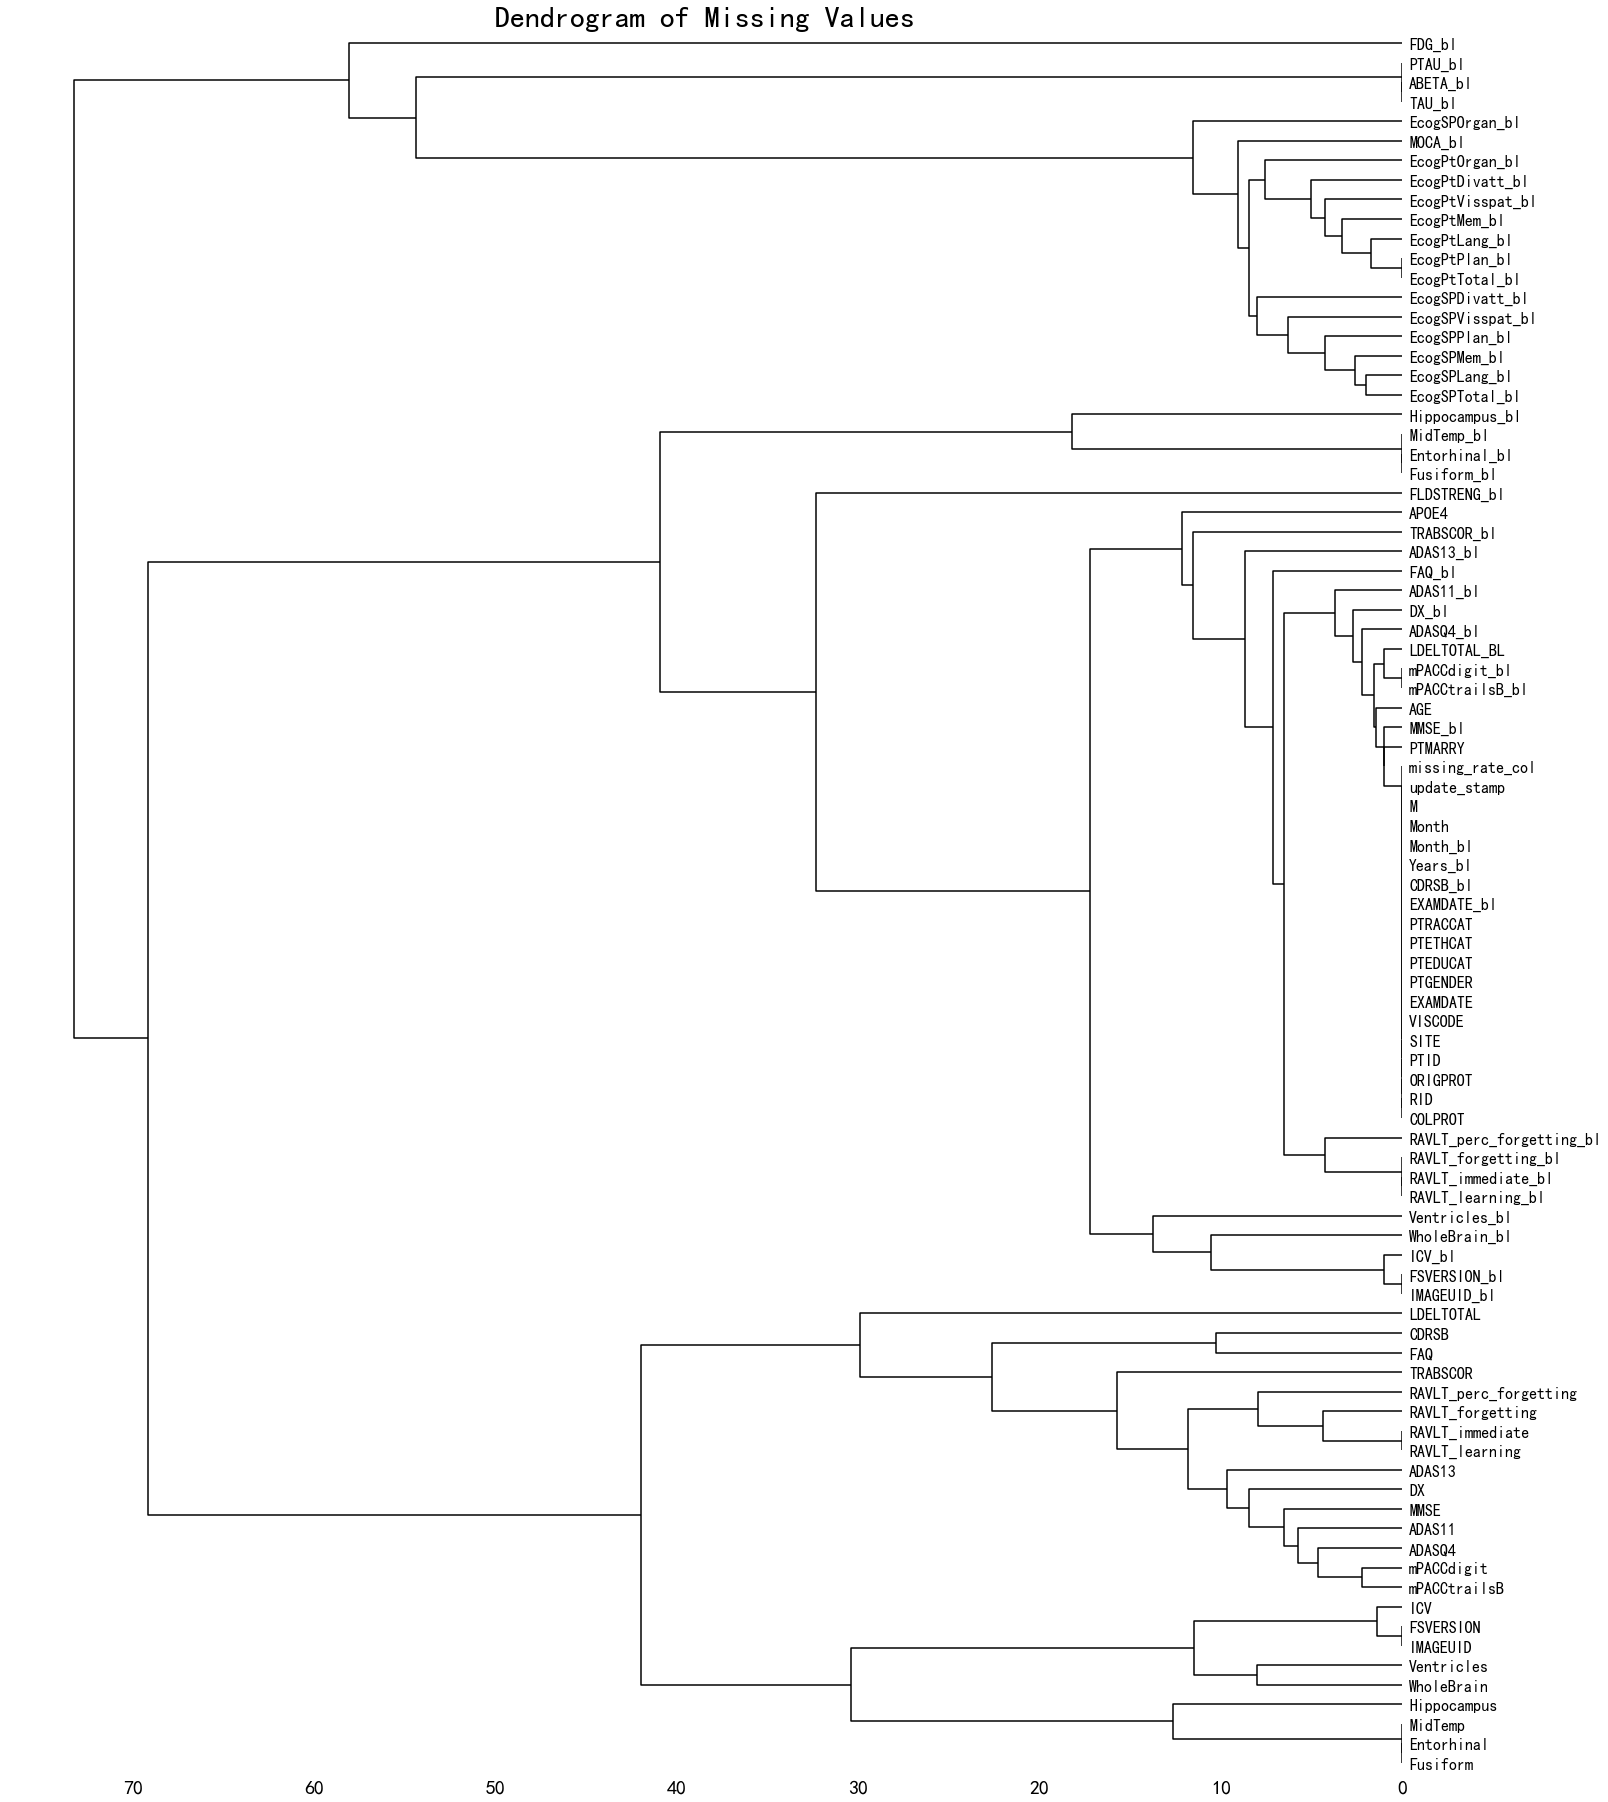

In [28]:
msno.dendrogram(data50_20)
plt.title('Dendrogram of Missing Values',fontsize=30, fontstyle= 'oblique')
#missingno 的树状图采用层次聚类算法对特征进行聚类，如上图所示，左侧的特征数据为一类，彼此的距离为 0（因为没有缺失数据），右侧的特征数据为另一类（两个存在缺失数据的特征）。
plt.savefig(img_path+'/DendrogramOfMissingValues.png')

In [29]:
# data_digit=data.select_dtypes(include=[int,float])
data_digit=data50_20.select_dtypes(exclude=object)
data_digit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8169 entries, 0 to 16221
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RID                       8169 non-null   int64  
 1   SITE                      8169 non-null   int64  
 2   AGE                       8167 non-null   float64
 3   PTEDUCAT                  8169 non-null   int64  
 4   APOE4                     8031 non-null   float64
 5   CDRSB                     4211 non-null   float64
 6   ADAS11                    3866 non-null   float64
 7   ADAS13                    3808 non-null   float64
 8   ADASQ4                    3881 non-null   float64
 9   MMSE                      3893 non-null   float64
 10  RAVLT_immediate           3790 non-null   float64
 11  RAVLT_learning            3790 non-null   float64
 12  RAVLT_forgetting          3771 non-null   float64
 13  RAVLT_perc_forgetting     3720 non-null   float64
 14  LDELTOT

In [30]:
import miceforest as mf
from sklearn.datasets import load_iris
import pandas as pd

# Load and format data
iris = pd.concat(load_iris(as_frame=True,return_X_y=True),axis=1)
iris.rename(columns = {'target':'species'}, inplace = True)
iris['species'] = iris['species'].astype('category')

# Introduce missing values
data_digit_amp = mf.ampute_data(data_digit,perc=0.25,random_state=1991)

# Create kernels
kernel = mf.ImputationKernel(
  data=data_digit_amp,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

# Our new dataset
new_data = data_digit_amp.iloc[range(8169 )]

# Make a multiple imputed dataset with our new data
new_data_imputed = kernel.impute_new_data(new_data)

# Return a completed dataset
new_completed_data = new_data_imputed.complete_data(0)

# check how well the imputations compare to the original data
# acclist = []
# for iteration in range(kernel.iteration_count()+1):
#     target_na_count = kernel.na_counts["target"]
#     compdat = kernel.complete_data(dataset=0,iteration=iteration)

#     # Record the accuract of the imputations of target.
#     acclist.append(
#       round(1-sum(compdat['target'] != iris['target'])/target_na_count,2)
#     )

# acclist shows the accuracy of the imputations over the iterations.
print(new_completed_data)

Initialized logger with name mice 1-3
Dataset 0
1  | RID | Month | Month_bl | Years_bl | M | CDRSB_bl | missing_rate_col | SITE | PTEDUCAT | mPACCtrailsB_bl | mPACCdigit_bl | MMSE_bl | AGE | LDELTOTAL_BL | ADASQ4_bl | ADAS11_bl | RAVLT_learning_bl | RAVLT_forgetting_bl | RAVLT_immediate_bl | FAQ_bl | RAVLT_perc_forgetting_bl | ADAS13_bl | TRABSCOR_bl | APOE4 | IMAGEUID_bl | ICV_bl | WholeBrain_bl | Ventricles_bl | Hippocampus_bl | Entorhinal_bl | MidTemp_bl | Fusiform_bl | FDG_bl | FAQ | CDRSB | MMSE | ADAS11 | mPACCdigit | mPACCtrailsB | ADASQ4 | RAVLT_immediate | RAVLT_forgetting | RAVLT_learning | ADAS13 | RAVLT_perc_forgetting | TRABSCOR | LDELTOTAL | IMAGEUID | ICV | WholeBrain | Ventricles | EcogPtLang_bl | EcogPtVisspat_bl | EcogSPTotal_bl | EcogPtTotal_bl | EcogSPMem_bl | EcogPtPlan_bl | EcogPtMem_bl | EcogSPLang_bl | EcogPtOrgan_bl | EcogSPDivatt_bl | EcogPtDivatt_bl | EcogSPPlan_bl | MOCA_bl | EcogSPVisspat_bl | EcogSPOrgan_bl | Hippocampus | Fusiform | Entorhinal | MidTemp
2

In [31]:
# from sklearn.linear_model import LinearRegression# For each imputed dataset, train a linear regression
# # on 'sepal length (cm)'
# intercepts = []
# target = 'sepal length (cm)'
# for d in range(kernel.dataset_count()):
#     comp_dat = kernel.complete_data(d)
#     comp_dat = pd.get_dummies(comp_dat)
#     X, y = comp_dat.drop(target,1), comp_dat[target]
#     model = LinearRegression()
#     model.fit(X,y)
#     intercepts.append(model.intercept_)# Load packages for plotting
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# # Make plot.
# x_axis = np.arange(1.93, 2.01, 0.0001)
# avg_intercept = round(np.mean(intercepts),2)
# var_intercept = round(np.var(intercepts),4)
# plt.plot(
#     x_axis,
#     norm.pdf(x_axis,avg_intercept,var_intercept)
# )
# plt.title(f"""
#     Assumed Distribution of Intercept Term
#     n=5, mean = {avg_intercept}, variance = {var_intercept}
#     """
# )

In [32]:
new_completed_data.sort_index(axis=0)

,RID,SITE,AGE,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,...,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,Years_bl,Month_bl,Month,M,missing_rate_col
0,2.0,11.0,74.3,14.0,0.0,0.0,10.67,18.67,5.0,28.0,...,1.6,2.00000,2.00,1.61538,1.45939,0.000000,0.00000,0.0,0.0,0.272727
15,522.0,14.0,80.4,13.0,0.0,0.5,18.67,25.67,7.0,25.0,...,1.4,1.33333,1.75,1.77778,1.03011,0.000000,0.00000,0.0,0.0,0.215909
16,6.0,100.0,80.4,13.0,0.0,1.0,19.00,26.00,8.0,23.0,...,1.0,1.16667,2.00,1.46154,1.00371,0.503765,6.03279,6.0,6.0,0.227273
17,6.0,100.0,80.4,13.0,0.0,1.5,15.33,25.67,7.0,26.0,...,1.0,1.16667,1.50,1.17949,1.12040,0.974675,11.67210,12.0,12.0,0.215909
18,6.0,100.0,80.4,13.0,0.0,2.0,11.33,23.00,9.0,24.0,...,1.4,1.00000,1.50,1.23684,1.23251,1.456540,17.44260,18.0,18.0,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16213,6559.0,126.0,63.6,16.0,0.0,0.0,8.00,14.00,5.0,29.0,...,1.0,1.00000,1.50,1.24324,1.22201,4.142370,49.60660,48.0,48.0,0.215909
16217,6080.0,941.0,76.8,12.0,0.0,2.0,12.33,19.67,7.0,27.0,...,1.0,1.00000,1.00,1.10526,1.18066,5.051330,60.49180,60.0,60.0,0.318182
16219,167.0,305.0,59.6,18.0,2.0,0.5,16.00,23.00,6.0,28.0,...,1.2,1.00000,1.25,1.26316,1.13679,4.197130,49.31150,48.0,48.0,0.318182
16220,4119.0,126.0,79.3,20.0,0.0,7.0,22.00,32.00,10.0,25.0,...,1.0,1.00000,1.00,1.17949,1.51660,11.230700,134.49200,132.0,132.0,0.272727


In [33]:
new_completed_data.to_csv(data_path+"/new_completed_data.csv")

In [34]:
new_completed_data.columns

Index(['RID', 'SITE', 'AGE', 'PTEDUCAT', 'APOE4', 'CDRSB', 'ADAS11', 'ADAS13',
       'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 'TRABSCOR',
       'FAQ', 'IMAGEUID', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'mPACCdigit',
       'mPACCtrailsB', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl',
       'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL',
       'TRABSCOR_bl', 'FAQ_bl', 'mPACCdigit_bl', 'mPACCtrailsB_bl',
       'IMAGEUID_bl', 'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl',
       'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'MOCA_bl',
       'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl', 'EcogPtPlan_bl',
       'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl', 'EcogSPMem_bl',
       'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl', 'EcogSP

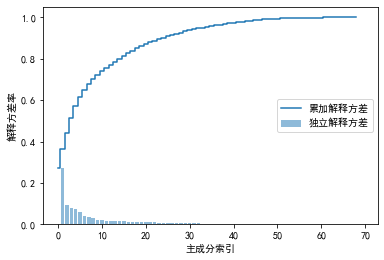

In [35]:
# split the data，train：test=7:3
x, y = new_completed_data.iloc[:, 1:].values, new_completed_data.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=0)
 
# standardize the feature 标准化
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

# 构造协方差矩阵，得到特征向量和特征值
cov_matrix = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
# print("values\n ", eigen_val, "\nvector\n ", eigen_vec)# 可以打印看看

# 解释方差比
tot = sum(eigen_val)  # 总特征值和
var_exp = [(i / tot) for i in sorted(eigen_val, reverse=True)]  # 计算解释方差比，降序
# print(var_exp)
cum_var_exp = np.cumsum(var_exp)  # 累加方差比率
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
plt.bar(range(1,70), var_exp, alpha=0.5, align='center', label='独立解释方差')  # 柱状 Individual_explained_variance
plt.step(range(69), cum_var_exp, where='mid', label='累加解释方差')  # Cumulative_explained_variance
plt.ylabel("解释方差率")
plt.xlabel("主成分索引")
plt.legend(loc='right')
plt.show()

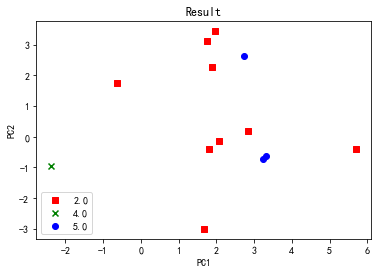

In [54]:

 # 特征变换
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:, i]) for i in range(len(eigen_val))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)  # (特征值，特征向量)降序排列
# print(eigen_pairs)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))  # 降维投影矩阵W
# print(w)
x_train_pca = x_train_std.dot(w)
# print(x_train_pca)
color = ['r', 'g', 'b']
marker = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), color, marker):
    plt.scatter(x_train_pca[y_train == l, 0],
                 x_train_pca[y_train == l, 1],
                 c=c, label=l, marker=m)
plt.title('Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()


In [58]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range


def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

X=standardization(x)

In [1]:
# 使用sklearn 的DecisionTreeClassifier判断变量重要性
# 建立分类决策树模型对象
dt_model = DecisionTreeClassifier(random_state=1)
# 将数据集的维度和目标变量输入模型
dt_model.fit(X, y)
# 获取所有变量的重要性
feature_importance = dt_model.feature_importances_
print(feature_importance)
# 结果如下
# [0.00437481 0.0046432  0.00571365 0.00357669 0.00304331 0.00706166...]
# 做可视化
x = range(len(feature_importance))
plt.figure(figsize=(20,6),dpi=300)
plt.bar(x, height=feature_importance)
plt.title("The importance of each feature")
plt.xlabel("feature")
plt.ylabel("feature importance")
plt.savefig(img_path+'/feature_importance.png')
plt.show()


NameError: name 'DecisionTreeClassifier' is not defined

降维后的X维数：11500*n_components:
 (8169, 10)
降维后的X维数：11500*n_components:
 (8169, 15)
降维后的X维数：11500*n_components:
 (8169, 20)
降维后的X维数：11500*n_components:
 (8169, 25)
降维后的X维数：11500*n_components:
 (8169, 30)
降维后的X维数：11500*n_components:
 (8169, 35)
降维后的X维数：11500*n_components:
 (8169, 40)
降维后的X维数：11500*n_components:
 (8169, 45)
降维后的X维数：11500*n_components:
 (8169, 50)
降维后的X维数：11500*n_components:
 (8169, 55)
降维后的X维数：11500*n_components:
 (8169, 60)
降维后的X维数：11500*n_components:
 (8169, 65)


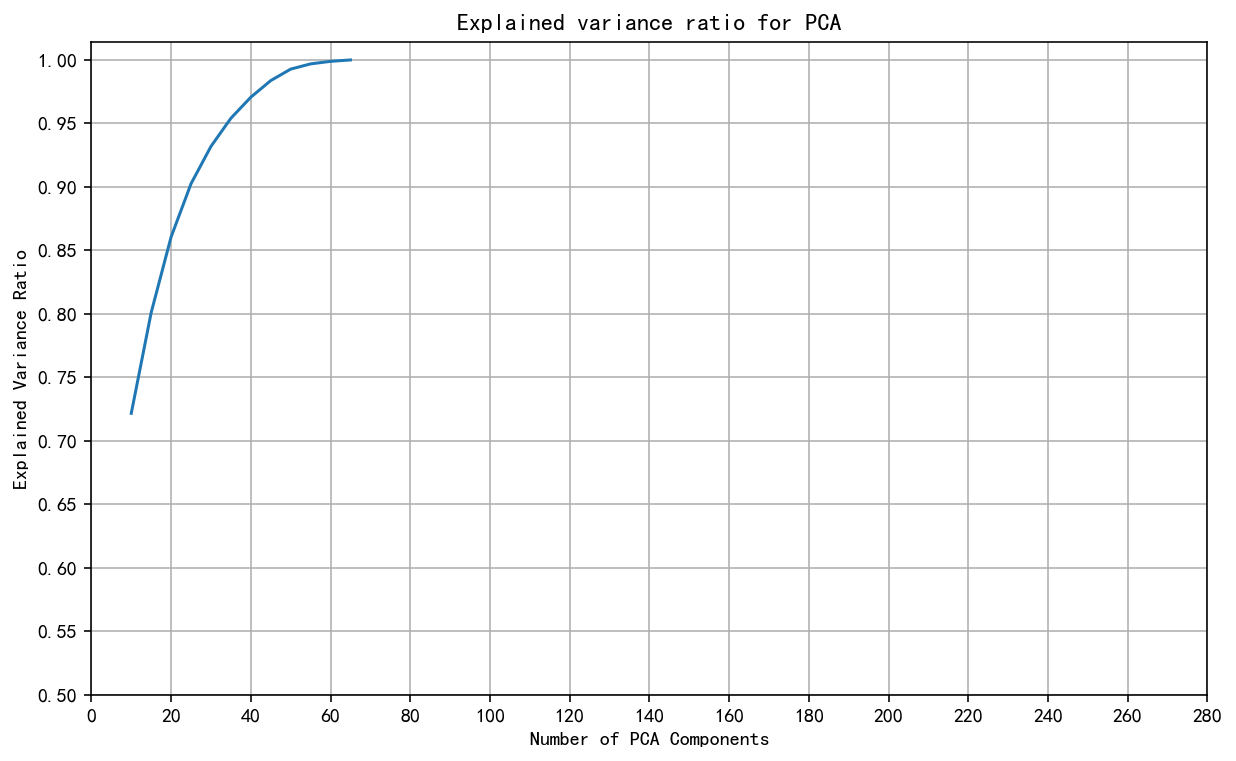

In [63]:

# 四：使用sklearn的PCA进行维度转换
# 建立PCA模型对象 n_components控制输出特征（主成分）个数
candidate_components = range(10,70,5)
explained_ratios=[]
for c in candidate_components:
    pca_model = PCA(n_components=c)
    pca_model.fit(X)
    # 对数据集进行转换映射
    pca_model.transform(X)
    # 获得转换后的所有主成分
    print("降维后的X维数：8169*n_components:\n",pca_model.transform(X).shape)
    explained_ratios.append(np.sum(pca_model.explained_variance_ratio_))
    pass
plt.figure(figsize=(10,6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5,1.05,.05))
plt.xticks(np.arange(0,300,20))
plt.show()


In [64]:
# 五：选定主成分的个数是30，保存数据
pca_model=PCA(n_components=30)
pca_result=pca_model.fit_transform(X)
print(type(pca_result))
print(pca_result.shape)
# (11500, 30)
print(pca_result)
print(np.sum(pca_result,axis=0,keepdims=True))
print(np.sum(pca_result,axis=0,keepdims=True).shape)
# (1, 30)


<class 'numpy.ndarray'>
(8169, 60)
[[-1.72242924  3.08349945 -5.9484655  ... -0.07715265  0.02662538
  -0.10334968]
 [ 3.96123084  0.50753521  0.27857736 ... -0.04722186  0.21992006
   0.17156405]
 [ 3.15762187 -2.12070149  0.44693348 ... -0.05696418 -0.03865463
   0.06118568]
 ...
 [-4.55263599 -1.82760891 -3.98349311 ...  0.21998047  0.23564019
  -0.02066838]
 [-3.52324644 -4.41246628 -0.79143129 ...  0.01277851  0.06575163
   0.13559459]
 [-6.05844448 -3.1553865  -1.78885857 ... -0.01857584  0.01284083
   0.01766627]]
[[ 0.00000000e+00  0.00000000e+00  1.70530257e-13 -4.54747351e-13
   2.27373675e-13 -1.13686838e-13  0.00000000e+00 -1.13686838e-13
   4.54747351e-13  2.41584530e-13 -4.61852778e-14  1.13686838e-13
  -8.52651283e-14 -2.84217094e-14  9.23705556e-14 -1.70530257e-13
   5.68434189e-14 -5.68434189e-14  0.00000000e+00  5.68434189e-14
   9.94759830e-14  1.56319402e-13 -3.55271368e-14  1.56319402e-13
   1.49213975e-13 -2.52242671e-13  1.13686838e-13 -1.84741111e-13
  -4.121147

In [67]:
# 六：将降维后的数据保存为csv文件
df=pd.DataFrame(pca_result)
# df数据小数位数过多，为16位，将df数据全部转换为3位小数
print("*"*100)
df=df.round(decimals=3)
print(df)
df.to_csv(data_path+"/pca_data.csv")


****************************************************************************************************
         0      1      2      3      4      5      6      7      8      9   \
0    -1.722  3.083 -5.948 -0.917 -1.927 -1.970  2.989 -1.561 -0.624 -0.534   
1     3.961  0.508  0.279 -2.012 -2.066 -0.119 -0.876 -0.315 -0.885  0.274   
2     3.158 -2.121  0.447 -2.409 -1.289 -0.444 -0.454 -0.730 -0.414  1.342   
3     3.344  0.723  0.807 -0.869 -4.583 -1.306 -1.010 -1.100  0.075  0.358   
4     3.148 -2.176  1.320 -1.967 -1.753 -1.233 -1.105 -0.818 -0.412  0.840   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
8164 -3.480 -2.850  0.984 -0.492  1.567  0.080  3.089  2.038  3.439 -2.576   
8165 -0.709 -2.799  2.155  0.485 -1.251 -0.173 -0.968  0.313  3.245 -2.255   
8166 -4.553 -1.828 -3.983  0.302  0.049  2.017 -1.298  1.195 -1.151 -1.998   
8167 -3.523 -4.412 -0.791  5.627  1.273  0.331  0.816  0.569  0.512  0.171   
8168 -6.058 -3.155 -1.789  0.640  0.822  

In [68]:
explained_ratios

[0.7214749542408587,
 0.8008252332871606,
 0.8604018392204773,
 0.9023128354436623,
 0.9316882787189942,
 0.9538477189444478,
 0.9704169872691408,
 0.9835053463164285,
 0.9925299155366829,
 0.996649972591561,
 0.998646834822219,
 0.9997440421056545]

In [91]:
feature_importance
feature_importance_dic={i:j for i in new_completed_data.columns[1:] for j in feature_importance}

In [97]:
feature_sort=sorted(feature_importance_dic.items(),reverse=True)

In [101]:
feature_sort_dic={i[0]:i[1] for i in feature_sort}
feature_sort_dic

{'missing_rate_col': 0.03586528249085982,
 'mPACCtrailsB_bl': 0.03586528249085982,
 'mPACCtrailsB': 0.03586528249085982,
 'mPACCdigit_bl': 0.03586528249085982,
 'mPACCdigit': 0.03586528249085982,
 'Years_bl': 0.03586528249085982,
 'WholeBrain_bl': 0.03586528249085982,
 'WholeBrain': 0.03586528249085982,
 'Ventricles_bl': 0.03586528249085982,
 'Ventricles': 0.03586528249085982,
 'TRABSCOR_bl': 0.03586528249085982,
 'TRABSCOR': 0.03586528249085982,
 'SITE': 0.03586528249085982,
 'RAVLT_perc_forgetting_bl': 0.03586528249085982,
 'RAVLT_perc_forgetting': 0.03586528249085982,
 'RAVLT_learning_bl': 0.03586528249085982,
 'RAVLT_learning': 0.03586528249085982,
 'RAVLT_immediate_bl': 0.03586528249085982,
 'RAVLT_immediate': 0.03586528249085982,
 'RAVLT_forgetting_bl': 0.03586528249085982,
 'RAVLT_forgetting': 0.03586528249085982,
 'PTEDUCAT': 0.03586528249085982,
 'Month_bl': 0.03586528249085982,
 'Month': 0.03586528249085982,
 'MidTemp_bl': 0.03586528249085982,
 'MidTemp': 0.03586528249085982,

69

In [102]:
selected_features=[]
for i,(k,v) in enumerate(feature_sort_dic.items()):
    if i in range(30):
        selected_features.append(k)
selected_features

['missing_rate_col',
 'mPACCtrailsB_bl',
 'mPACCtrailsB',
 'mPACCdigit_bl',
 'mPACCdigit',
 'Years_bl',
 'WholeBrain_bl',
 'WholeBrain',
 'Ventricles_bl',
 'Ventricles',
 'TRABSCOR_bl',
 'TRABSCOR',
 'SITE',
 'RAVLT_perc_forgetting_bl',
 'RAVLT_perc_forgetting',
 'RAVLT_learning_bl',
 'RAVLT_learning',
 'RAVLT_immediate_bl',
 'RAVLT_immediate',
 'RAVLT_forgetting_bl',
 'RAVLT_forgetting',
 'PTEDUCAT',
 'Month_bl',
 'Month',
 'MidTemp_bl',
 'MidTemp',
 'MOCA_bl',
 'MMSE_bl',
 'MMSE',
 'M']

## 5.数据分析

In [107]:
#特征填充
feature_data=data50[selected_features]
feature_data

,missing_rate_col,mPACCtrailsB_bl,mPACCtrailsB,mPACCdigit_bl,mPACCdigit,Years_bl,WholeBrain_bl,WholeBrain,Ventricles_bl,Ventricles,...,RAVLT_forgetting,PTEDUCAT,Month_bl,Month,MidTemp_bl,MidTemp,MOCA_bl,MMSE_bl,MMSE,M
0,0.204545,-4.11991,-4.119910,-4.31670,-4.316700,0.000000,1229740.0,1229740.0,118233.0,118233.0,...,6.0,16,0.00000,0,27936.0,27936.0,NaN,28.0,28.0,0
1,0.170455,-15.87370,-15.873700,-16.29050,-16.290500,0.000000,1129830.0,1129830.0,84599.0,84599.0,...,4.0,18,0.00000,0,18422.0,18422.0,NaN,20.0,20.0,0
2,0.181818,-15.87370,-13.169900,-16.29050,-14.801300,0.498289,1129830.0,1100060.0,84599.0,88580.0,...,6.0,18,5.96721,6,18422.0,16972.0,NaN,20.0,24.0,6
3,0.170455,-15.87370,-19.837800,-16.29050,-21.029300,0.999316,1129830.0,1095640.0,84599.0,90099.0,...,7.0,18,11.96720,12,18422.0,17330.0,NaN,20.0,17.0,12
4,0.170455,-15.87370,-19.941000,-16.29050,-19.764000,1.998630,1129830.0,1088560.0,84599.0,97420.0,...,5.0,18,23.93440,24,18422.0,16398.0,NaN,20.0,19.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,0.318182,-3.76034,NaN,-5.04951,NaN,5.051330,847640.0,NaN,38072.4,NaN,...,NaN,12,60.49180,60,15868.0,NaN,24.0,29.0,NaN,60
16218,0.159091,-1.60192,0.308224,-2.67798,0.062428,4.043810,944955.0,NaN,27225.8,NaN,...,5.0,18,48.42620,48,24703.0,NaN,27.0,28.0,30.0,48
16219,0.318182,-2.38362,NaN,-2.39267,NaN,4.117730,1232820.0,NaN,20010.4,NaN,...,NaN,18,49.31150,48,23959.0,NaN,26.0,28.0,NaN,48
16220,0.284091,2.87922,NaN,1.54743,NaN,11.230700,1115140.0,NaN,38806.0,NaN,...,NaN,20,134.49200,132,21497.0,NaN,27.0,30.0,NaN,132


In [109]:
 #机器学习模型填充
feature_data.isnull().sum()

missing_rate_col               0
mPACCtrailsB_bl                2
mPACCtrailsB                4832
mPACCdigit_bl                  2
mPACCdigit                  4838
Years_bl                       0
WholeBrain_bl                482
WholeBrain                  6626
Ventricles_bl                772
Ventricles                  6879
TRABSCOR_bl                  266
TRABSCOR                    5293
SITE                           0
RAVLT_perc_forgetting_bl      63
RAVLT_perc_forgetting       5068
RAVLT_learning_bl             40
RAVLT_learning              4963
RAVLT_immediate_bl            40
RAVLT_immediate             4964
RAVLT_forgetting_bl           42
RAVLT_forgetting            4995
PTEDUCAT                       0
Month_bl                       0
Month                          0
MidTemp_bl                  2313
MidTemp                     7954
MOCA_bl                     7402
MMSE_bl                        1
MMSE                        4840
M                              0
dtype: int

In [121]:
data.isnull().sum()

RID             0
COLPROT         0
ORIGPROT        0
PTID            0
SITE            0
               ..
Years_bl        0
Month_bl        0
Month           0
M               0
update_stamp    0
Length: 116, dtype: int64

In [113]:
data

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,58:48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,6080,ADNI3,ADNI3,941_S_6080,941,m60,2022-11-4,SMC,76.8,Female,...,NaN,NaN,NaN,NaN,1.0192,5.051330,60.49180,60,60,00:12.0
16218,6473,ADNI3,ADNI3,135_S_6473,135,m48,2022-11-1,CN,66.1,Female,...,NaN,NaN,NaN,NaN,1.0028,4.043810,48.42620,48,48,00:13.0
16219,6498,ADNI3,ADNI3,305_S_6498,305,m48,2022-11-7,EMCI,79.4,Male,...,NaN,1.13679,NaN,1.3892,NaN,4.117730,49.31150,48,48,59:52.0
16220,4119,ADNI3,ADNI2,003_S_4119,3,m132,2022-11-10,CN,79.3,Male,...,30.31,1.30487,NaN,1.0025,NaN,11.230700,134.49200,132,132,59:26.0


## EDA

## 6.训练集与测试集

## 7.构建模型

## 8.总结